In [22]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from AHM.ahm import AHM

In [2]:
m = AHM(config="parameter_data.json", project_name="test_project", seed=None)

*#####################################################################*
#              Assisted History Matching Python-package               #
#         Copyright (c) 2019-2024 J. Buchwald, T. Nagel               #
#                  Distributed under the MIT license                  #
*#####################################################################*
* creating nonexistent directories...
reading in config data {'procs': 1, 'hpc': False, 'exp_model': 'None', 'forward_model': 'nummodel.py', 'ogsinputdir': '/home/buchwalj/github/parameter_sampling/example/', 'meshgeo_accuracy': 0.01, 'keep_output_data': True, 'input_data': {'damping': 0.6, 'residual_gas_saturation': 0.0045}, 'distribution': {'damping': {'low': 0.1, 'mid': 0.5, 'high': 1.0, 'dist': 'uniform'}, 'residual_gas_saturation': {'low': 1e-16, 'high': 0.01, 'dist': 'loguniform'}}, 'observation_points': {'pt0': [0.5, 0.0, 0.0]}, 'exp_err': {'temp': 4.0, 'press': 200000.0, 'ux': 2e-05, 'uy': 2e-05, 'sigmaxx': 200000.0, 'sigmay

In [ ]:
#df = m.createDesign(designtype="ovat", selected_input={"damping": 0.4})

In [30]:
df = m.createDesign(designtype="lhs", selected_input={"residual_gas_saturation": 0.4}, size=20)

In [44]:
df.sort_values(by="residual_gas_saturation", ascending=False, inplace=True)

In [45]:
df.reset_index(drop=True, inplace=True)

In [46]:
df

,residual_gas_saturation
0,3.018202e-03
1,9.868606e-04
2,1.871613e-04
3,5.851472e-05
4,8.465779e-06
5,1.444524e-06
6,1.748344e-07
7,4.430611e-08
8,7.572628e-09
9,2.463401e-09


In [47]:
r = m.runModel(df)

0.0030182021578646708
OGS finished with project file test_project/results/LHS/run_0_ogs.prj.
Execution took 52.79152822494507 s
Project file written to output.
0.0009868606063108795
OGS finished with project file test_project/results/LHS/run_1_ogs.prj.
Execution took 43.80851745605469 s
Project file written to output.
0.00018716128784658617
OGS finished with project file test_project/results/LHS/run_2_ogs.prj.
Execution took 46.735811948776245 s
Project file written to output.
5.8514715412586115e-05
OGS finished with project file test_project/results/LHS/run_3_ogs.prj.
Execution took 51.47936654090881 s
Project file written to output.
8.465778880319795e-06
OGS finished with project file test_project/results/LHS/run_4_ogs.prj.
Execution took 57.81123208999634 s
Project file written to output.
1.4445241257456203e-06
OGS finished with project file test_project/results/LHS/run_5_ogs.prj.
Execution took 43.333088397979736 s
Project file written to output.
1.7483436990478358e-07
OGS finished

In [48]:
dir = "test_project/results/LHS"
files = [f"run_{i}_ogs.log" for i in range(len(df))]

In [49]:
from ogstools.logparser import (
    fill_ogs_context,
    parse_file,
    analysis_time_step,
    time_step_vs_iterations,
)

records = []
for i in range(len(df)):
    records.append(parse_file(f"{dir}/{files[i]}"))
df_records = [pd.DataFrame(record) for record in records]
df_logs = [fill_ogs_context(record) for record in df_records]
df_ts_it = [time_step_vs_iterations(df_log) for df_log in df_logs]
df_ts = [analysis_time_step(df_log) for df_log in df_logs]

In [50]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.coolwarm(np.linspace(0,1,len(df))))

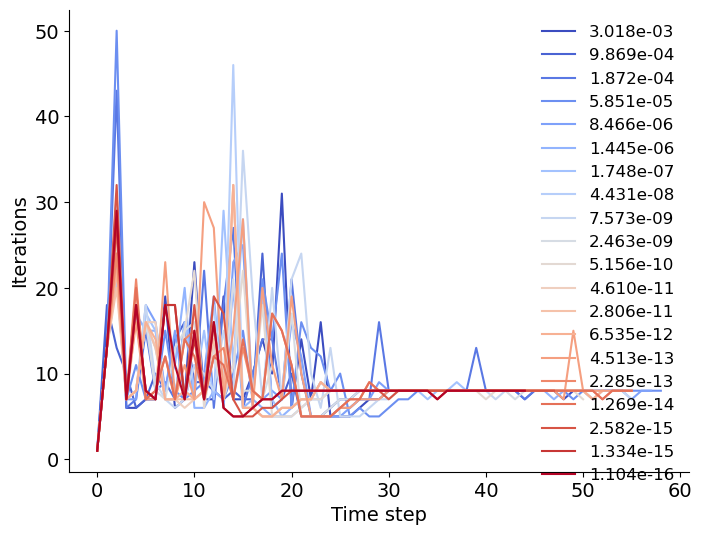

In [57]:
for i, entry in enumerate(df_ts_it):
    plt.plot(entry, label="{:.3e}".format(df.residual_gas_saturation[i]))
plt.xlabel("Time step")
plt.ylabel("Iterations")
plt.legend()

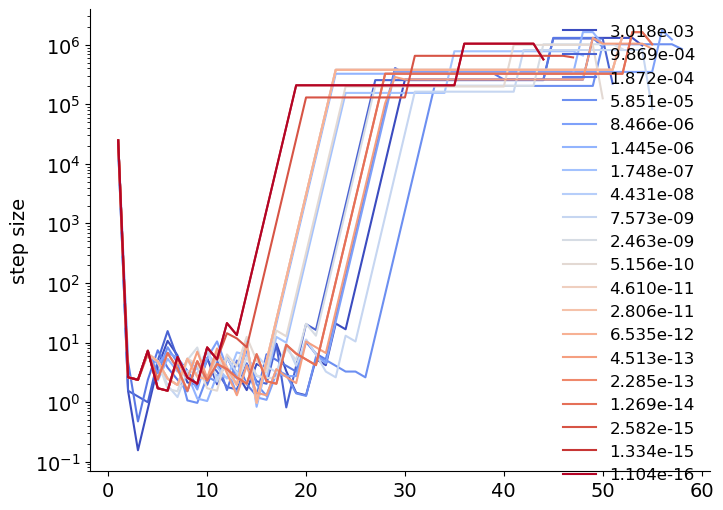

In [58]:
for i, entry in enumerate(df_ts):
    plt.plot(entry.loc[0]["step_size"], label="{:.3e}".format(df.residual_gas_saturation[i]))
plt.ylabel("step size")
plt.yscale("log")
plt.legend()

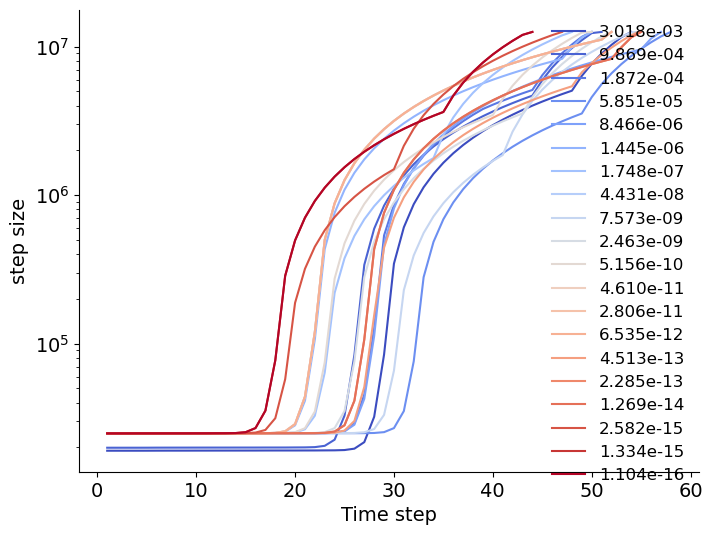

In [59]:
for i, entry in enumerate(df_ts):
    plt.plot(entry.loc[0]["step_size"].cumsum(), label="{:.3e}".format(df.residual_gas_saturation[i]))
plt.xlabel("Time step")
plt.ylabel("step size")
plt.yscale("log")
plt.legend()